# Pre-Processing of Data from the Wind Tunnel

Data was collected on 29.10.25 with the force, and encoder counts from our sensor and the ground truth 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Cell 2: Load the CSV data from file
# Replace 'your_file.csv' with your actual file path
df = pd.read_csv('data/ground_truth_calibration/plot_take2_2.csv')
print("Data loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Data loaded successfully!
Shape: (28968, 13)


,timestamp_iso,timestamp_epoch,t_rel_s,device_name,port,value_raw_mps,value_clipped_mps,expected_error_pct,cov_lower_mps,cov_upper_mps,raw_serial_line,csv_col_0,csv_col_1
0,2025-10-29T17:21:57.838Z,15172.084414,42.931103,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN
1,2025-10-29T17:21:57.839Z,15172.087922,42.934611,Student,/dev/ttyACM1,1613405.00,20.0,NaN,NaN,NaN,"-0.5256, 1613405",-0.5256,1613405.0
2,2025-10-29T17:21:57.839Z,15172.088468,42.935157,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN
3,2025-10-29T17:21:57.839Z,15172.093459,42.940148,Student,/dev/ttyACM1,1613405.00,20.0,NaN,NaN,NaN,"-0.5356, 1613405",-0.5356,1613405.0
4,2025-10-29T17:21:57.839Z,15172.093505,42.940193,Ground Truth,/dev/ttyACM0,-0.38,0.0,NaN,NaN,NaN,-0.38,-0.3800,NaN


In [12]:
# Cell 3: Display data info and check for missing values
print("Dataset Information:")
print(df.info())
print("\n" + "="*60)
print("\nMissing values:")
print(df.isnull().sum())
print("\n" + "="*60)
print("\nColumn names:")
print(df.columns.tolist())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28968 entries, 0 to 28967
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp_iso       28968 non-null  object 
 1   timestamp_epoch     28968 non-null  float64
 2   t_rel_s             28968 non-null  float64
 3   device_name         28968 non-null  object 
 4   port                28968 non-null  object 
 5   value_raw_mps       28968 non-null  float64
 6   value_clipped_mps   28968 non-null  float64
 7   expected_error_pct  13780 non-null  float64
 8   cov_lower_mps       13780 non-null  float64
 9   cov_upper_mps       13780 non-null  float64
 10  raw_serial_line     28968 non-null  object 
 11  csv_col_0           28968 non-null  float64
 12  csv_col_1           14348 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.9+ MB
None


Missing values:
timestamp_iso             0
timestamp_epoch           0
t_re

In [13]:
# Cell 4: Extract Ground Truth data
ground_truth_df = df[df['device_name'] == 'Ground Truth'][['timestamp_iso', 't_rel_s', 'csv_col_0']].copy()

print(f"Ground Truth records: {len(ground_truth_df)}")
print("\nGround Truth data:")
ground_truth_df.head(10)

Ground Truth records: 14620

Ground Truth data:


,timestamp_iso,t_rel_s,csv_col_0
0,2025-10-29T17:21:57.838Z,42.931103,-0.38
2,2025-10-29T17:21:57.839Z,42.935157,-0.38
4,2025-10-29T17:21:57.839Z,42.940193,-0.38
6,2025-10-29T17:21:57.839Z,42.947807,-0.38
8,2025-10-29T17:21:57.843Z,42.952867,-0.38
9,2025-10-29T17:21:57.843Z,42.955255,-0.38
12,2025-10-29T17:21:57.860Z,42.962805,-0.38
14,2025-10-29T17:21:57.870Z,42.965176,-0.38
16,2025-10-29T17:21:57.870Z,42.970995,-0.38
18,2025-10-29T17:21:57.870Z,42.975165,-0.38


In [14]:
student_df = df[df['device_name'] == 'Student'][['timestamp_iso', 't_rel_s', 'csv_col_0','csv_col_1']].copy()
print(f"Student records: {len(student_df)}")
print("\nStudent data:")
student_df.head(10)

Student records: 14348

Student data:


,timestamp_iso,t_rel_s,csv_col_0,csv_col_1
1,2025-10-29T17:21:57.839Z,42.934611,-0.5256,1613405.0
3,2025-10-29T17:21:57.839Z,42.940148,-0.5356,1613405.0
5,2025-10-29T17:21:57.839Z,42.944576,-0.5302,1613405.0
7,2025-10-29T17:21:57.843Z,42.950881,-0.5272,1613405.0
10,2025-10-29T17:21:57.843Z,42.955347,-0.5314,1613405.0
11,2025-10-29T17:21:57.843Z,42.962593,-0.5286,1613405.0
13,2025-10-29T17:21:57.870Z,42.964713,-0.5334,1613405.0
15,2025-10-29T17:21:57.870Z,42.969305,-0.5316,1613405.0
17,2025-10-29T17:21:57.870Z,42.974785,-0.5355,1613405.0
19,2025-10-29T17:21:57.870Z,42.979600,-0.5328,1613405.0


### Convert Raw Encoder Counts to Ticks

In [15]:
# Calculate differences between consecutive points
student_df['csv_col_1_diff'] = student_df['csv_col_1'].diff()

# Print the first few rows to verify
print("Differences between consecutive points:")
print(student_df[['t_rel_s', 'csv_col_1', 'csv_col_1_diff']].head(10))

# Print number of NaNs
print("The number of NaNs", student_df['csv_col_1_diff'].isnull().sum())


# # Optional: Plot the differences
# plt.figure(figsize=(10, 6))
# plt.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Consecutive Differences')
# plt.xlabel('Time (s)')
# plt.ylabel('Difference in csv_col_1')
# plt.title('Differences Between Consecutive Points in csv_col_1')
# plt.grid(True)
# plt.legend()
# plt.show()

Differences between consecutive points:
      t_rel_s  csv_col_1  csv_col_1_diff
1   42.934611  1613405.0             NaN
3   42.940148  1613405.0             0.0
5   42.944576  1613405.0             0.0
7   42.950881  1613405.0             0.0
10  42.955347  1613405.0             0.0
11  42.962593  1613405.0             0.0
13  42.964713  1613405.0             0.0
15  42.969305  1613405.0             0.0
17  42.974785  1613405.0             0.0
19  42.979600  1613405.0             0.0
The number of NaNs 1


## Plotting

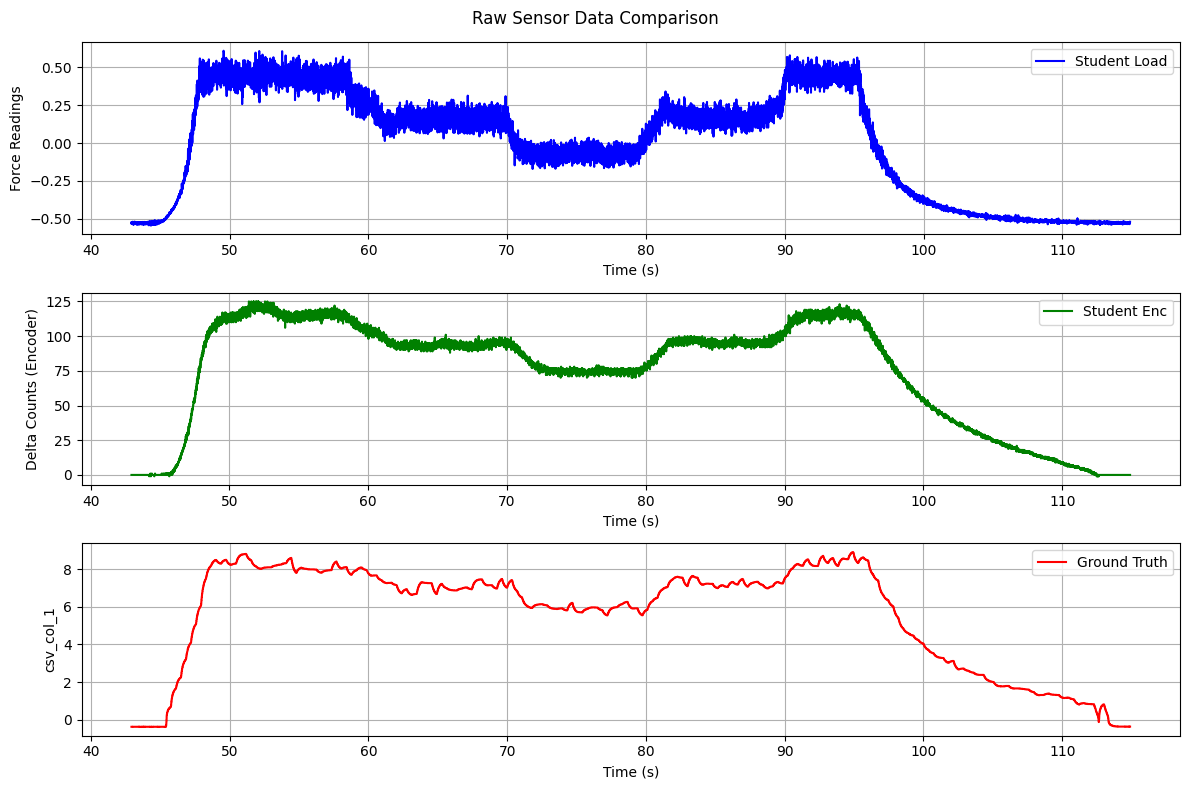

In [16]:
# Create figure with 2 subplots stacked vertically
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
fig.suptitle('Raw Sensor Data Comparison')

# First subplot:  Load Cell (N)
ax1.plot(student_df['t_rel_s'], student_df['csv_col_0'], label='Student Load', color='blue')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Force Readings')
ax1.legend()
ax1.grid(True)

# Second subplot: Encoder Counts from student data
ax2.plot(student_df['t_rel_s'], student_df['csv_col_1_diff'], label='Student Enc', color='green')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Delta Counts (Encoder)')
ax2.legend()
ax2.grid(True)

ax3.plot(ground_truth_df['t_rel_s'], ground_truth_df['csv_col_0'], label='Ground Truth', color='red')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('csv_col_1')
ax3.legend()
ax3.grid(True)

#Third Subplot: Ground Truth

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()